<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/Laboratorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Vecinos Más Cercanos**

En este lab, cargarás un conjunto de datos de un cliente, adaptarás la información y utilizarás el algoritmo de k-vecinos más cercanos para predecir un punto de datos. 

¿Qué es K-Vecinos Más Cerca?

Vecinos K Más Cercanos es un algoritmo para aprendizaje supervisado. Donde los datos se entrenana con puntos de datos que corresponden a su clasificación. Como un punto se predice, toma en cuenta los puntos 'K' más cercanos para determinar su clasificación.

**Aquí hay una forma de ver el algoritmo de los K vecinos más cercanos.**

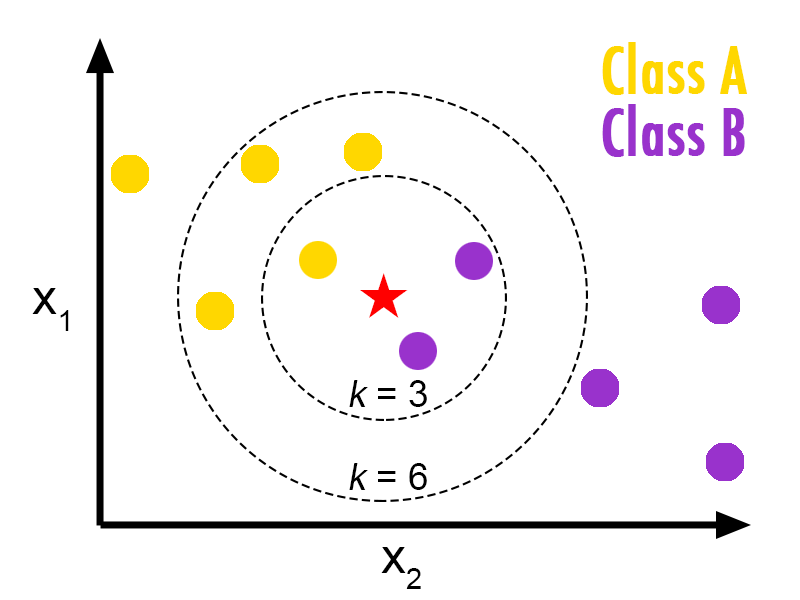

En este caso, tenemos puntos de datos de Clase A y B. Deseamos predecir dónde está la estrella (punto de datos de prueba). Si consideramos un valor k de 3 (3 el punto más cercano) obtendremos una predicción de Clase B. Sin embargo, si consideramos un valor k de 6, obtendremos una predicción de Clase A.

En este sentido, es importante considerar el valor de k. Mirando al diagrama, deberías deducir lo que es realmente un algormitmo de K Vecinos más cercanos. 

Carguemos las librerías necesarias

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Acerca del set de datos

Imagina un proveedor de telecomunicaciones que ha segmentado la base de sus clientes por servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos se pueden usar para predecir la pertenencia de grupo del envío, la compañía podría personalizar las ofertas para los prospectos. Es un problema de clasificación. O sea, dado un set de datos, con etiquetas predefinidas, necesitaremos construir un modelo para predecir la clase de un nuevo o desconocido caso. 

Este ejemplo hace foco en datos demográficos, sean region, edad, estado civil, para predecir patrones de uso. 

El campo objetivo (target), llamado custcat, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, a saber:
  1- Servicio Básico
  2- E-Servicio
  3- Servicio Plus
  4- Servicio Total

Nuestro objetivo es construir un clasificador para predecir la clase de casos desconocidos. Utilizaremos un tipo específico de clasificación llamado K vecino más cercano.

### Cargar Datos a partir de un archivo CSV (Valores Delimitados por Coma)

In [2]:
df = pd.read_csv('KNN_Dataset.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Visualización de Datos y Análisis

### Veamos cuántos de cada clase están en nuestro set de datos

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers
Puedes explorar fácilmente tus datos utilizando técnicas de visualización:

array([[<Axes: title={'center': 'income'}>]], dtype=object)

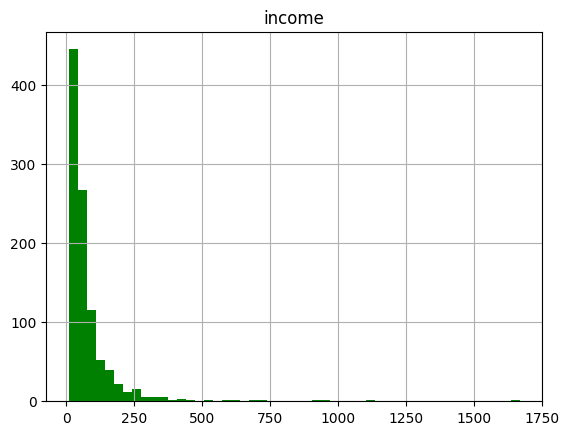

In [10]:
df.hist(column='income', bins=50, color='green')

### Feature set
Definamos feature sets, X:

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Para utilizar la librería scikit-learn, tenemos que convertir el data frame de Panda en un Numpy array:

In [13]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

¿Cuáles son nuestras etiquetas?

In [14]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

Normalizar los Datos
La estandarización de Datos brinda a los datos cero media y varianza de unidad, es buena práctica, especialmente para algoritmos tales como KNN el cual se basa en distancia de casos:

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split
Al margen de la exactitud de la muestra, está el porcentaje de las predicciones correctas que el modelo hace de los datos para el que no ha sido entrenado. Al hacer un entrenamiento y prueba en el mismo set de datos, de seguro tendrán baja exactitud de muestra debido a la probabilidad de estar sobre dimensionado.

Es importante que nuestros modelos tengan una exactitud de muestra alta porque el propósito de cualquier modelos es lograr predicciones lo más certeras posibles sobre datos no conocidos. Entonces, ¿cómo podemos mejorar la precisión? Una forma es utilizar un enfoque de evaluación llamado Train/Test Split (Entrenar/Evaluar Dividir).
Esta forma requiere dividir el set de datos en conjuntos de entrenamiento y prueba, los cuales son mutuamente exclusivos. Luego de ello, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba.

Este método brinda una evaluación más precisa porque el set de prueba no es parte del conjunto de datos que ha sido utilizado para entrenar los datos. Es más realista para los problemas actuales.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (800, 11) (800,)
Set de Prueba: (200, 11) (200,)


# Clasificación
## K-vecinos más cercano (K-NN)
### Importar librería
Clasificador que implementa k-vecinos más cercanos.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### Entrenamiento
Comencemos con el algoritmo con k=4 por ahora:

In [31]:
k = 6
# Entrenar el Modelo y Predecir  
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Ahora podemos usar este modelo para predecir el conjunto de prueba
yhat6 = neigh6.predict(X_test)

Predicción
podemos utilizar el modelo para predecir el set de prueba:

In [32]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 2, 4])

### Evaluación de certeza
En clasificación multietiqueta, la función classification accuracy score computa la certeza del subconjunto. Esta función es igual a la función jaccard_similarity_score. Básicamente, calcula cómo se relacionan las etiquetas actuales con las etiquetas predichas dentro del set de pruebas.

In [33]:
from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.5025
Probar el set de Certeza:  0.34


Práctica
¿Puedes construir el modelo nuevamente, pero esta vez con k=6?

## ¿Qué paso con otro K?
K en KNN, es el número de los vecinos más cercanos para examinar. Se supone que el Usuario lo indique. Por lo tanto, ¿cómo elegimos el correcto K?
La solución general es reservar una parte de los datos para probaar la certeza del modelo. Luego, elegimos k =1, lo utilizamos como parte del entrenamiento para modelar, y calculamos la certeza de la predicción utilizando todas las muestras del set de pruebas. Repetir este proceso, aumentando el k, y viendo luego, cual es el mejor k para el modelo.

Podemos calcular la certeza de KNN para diferentes Ks.

In [34]:
Ks = 10
mean_acc = np.zeros((Ks-1))  # array para almacenar la precisión media para cada k
std_acc = np.zeros((Ks-1))  # array para almacenar la desviación estándar de la precisión para cada k

# loop sobre los valores de k (desde 1 hasta Ks-1)
for n in range(1,Ks):
    
    # Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)  # crear y entrenar el modelo
    yhat=neigh.predict(X_test)  # hacer predicciones
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  # calcular y almacenar la precisión media

    # calcular y almacenar la desviación estándar de la precisión
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# mostrar la precisión media para cada k
mean_acc


array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Dibujo de la certeza del modelo para diferentes números de vecinos

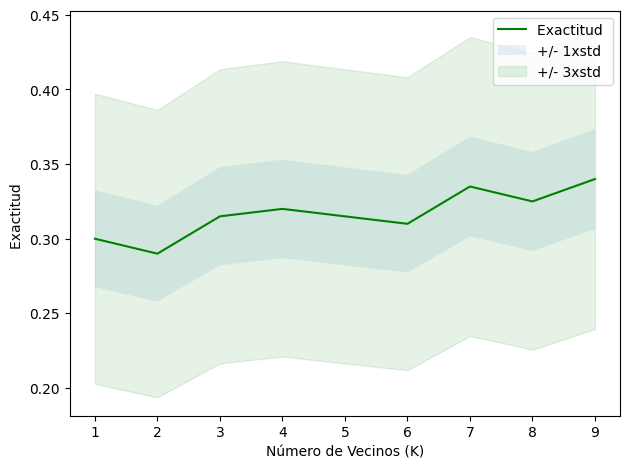

La mejor aproximación de certeza fue con  0.34 con k= 9


In [35]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Exactitud ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Exactitud ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

In [37]:
# Crear el DataFrame con las predicciones y las verdaderas etiquetas
results = pd.DataFrame({
    'Real': y_test,
    'Prediccion': yhat6
})

# Imprimir los primeros cinco registros
print(results.head())

   Real  Prediccion
0     4           3
1     1           3
2     1           3
3     2           4
4     4           4
